# 津田塾大学 OpenCampus 2023
## AIの発展とディープラーニング
## by nitta@tsuda.ac.jp


In [1]:
# Fashion-MNIST をダウンロードして変数に代入する

import tensorflow as tf

(x_train, t_train), (x_test, t_test) = tf.keras.datasets.fashion_mnist.load_data() 

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
# データの形を確認する
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
# ファッションアイテムの種類
class_names = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [4]:
# x_train (60000個)からランダムに50個選んで表示する

import numpy as np

select_indices = np.random.choice(range(len(x_train)), 50)

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

def showImages(xs,ts,ts2=[],rows=-1,cols=-1,w=2.8,h=2.8):
  N = len(xs)
  if rows < 0: rows = 1
  if cols < 0: cols = (N + rows -1) // rows
  fig, ax = plt.subplots(rows, cols, figsize=(w*cols, h*rows*1.5))
  idx = 0
  for row in range(rows):
    for col in range(cols) :
      if idx < N:
        if rows == 1 and cols == 1:
          axis = ax
        elif rows == 1:
          axis = ax[col]
        elif cols == 1:
          axis = ax[row]
        else:
          axis = ax[row][col]
        axis.imshow(xs[idx], cmap='gray')
        axis.text(0.5, -0.25, class_names[ts[idx]],fontsize=12, ha='center', transform=axis.transAxes)
        if len(ts2)>0:
          axis.text(0.5, -0.5, class_names[ts2[idx]],fontsize=12, ha='center', transform=axis.transAxes)
      axis.axis('off')
      idx += 1
  plt.show()

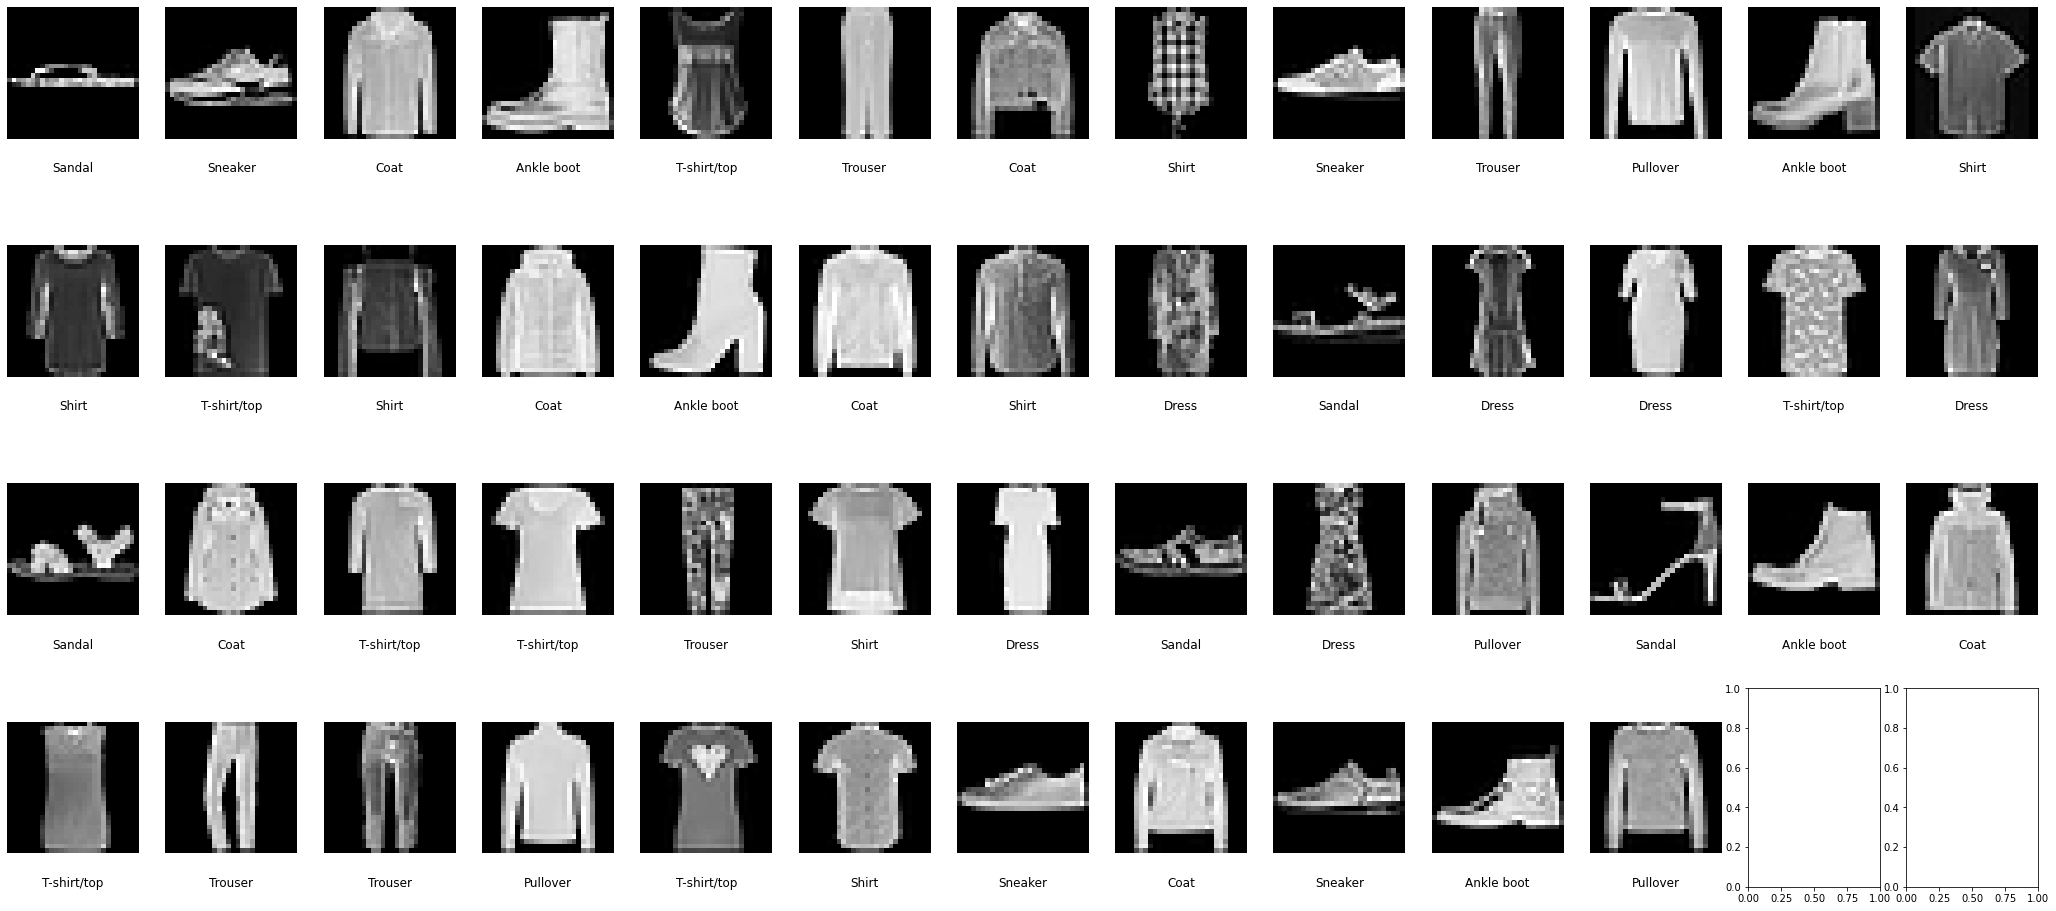

In [6]:
showImages(x_train[select_indices], t_train[select_indices], rows=4)

In [7]:
# 画像の解像度は 28x28 であるが、これを1次元ベクトル(要素数 28*28 = 784)に変換する。
# 各ピクセルの値は [0, 255] の値を持つ(0:黒, 255: 白, 128: 灰色)。これを[0.0, 1.0]の値に変換する。

x_train_rs = x_train.reshape((-1, 28*28)).astype('float32') / 255
x_test_rs = x_test.reshape((-1, 28*28)).astype('float32') / 255


print(x_train_rs.shape)
print(x_test_rs.shape)

(60000, 784)
(10000, 784)


In [8]:
# 正解ラベル[0,9]をone-hot-vectorに変換する。【例】2 → (0, 0, 1, 0, 0, 0, 0, 0, 0, 0)
from tensorflow import keras

class_num = len(class_names)

t_train_cat = keras.utils.to_categorical(t_train, class_num)
t_test_cat = keras.utils.to_categorical(t_test, class_num)

print(t_train_cat.shape)
print(t_test_cat.shape)

(60000, 10)
(10000, 10)


In [9]:
# ニューラルネットワークモデルを定義する
#from tensorflow import keras

def getModel(input_dim, output_dim):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(256, activation='relu',input_shape=input_dim))
  model.add(tf.keras.layers.Dense(output_dim, activation='softmax'))
  return model

In [10]:
# ニューラルネットワークモデルを作成する
model = getModel((28*28,), 10)

In [11]:
# ニューラルネットワークモデルの構造を表示する
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 誤差の計算方法と学習方法を設定する
# 誤差の計算方法: categorical cross entropy
# 学習方法: Adam, 学習率: 0.0005
model.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), 
    metrics=['accuracy']
  )


In [13]:
# 訓練データを「学習用データ」と「検証用データ」に 8:2 の比率で分ける
from sklearn.model_selection import train_test_split

x_fit, x_val, t_fit, t_val = train_test_split(x_train_rs, t_train_cat, test_size=0.2, random_state=42)
print(x_fit.shape)
print(x_val.shape)
print(t_fit.shape)
print(t_val.shape)

(48000, 784)
(12000, 784)
(48000, 10)
(12000, 10)


In [14]:
# 学習する
history = model.fit(
    x_fit,       # 訓練データ 
    t_fit,   # 訓練データの正解
    batch_size=32, # 32個の訓練データごとに学習を進める
    epochs=10,     # 訓練データ全体について10回繰り返す
    shuffle=True,  # シャッフル
    validation_data=(x_val, t_val) # epoch毎にテストデータで正解率を確認すt
  )

Epoch 1/10
1500/1500 [==============================] - 12s 4ms/step - loss: 0.5251 - accuracy: 0.8177 - val_loss: 0.4166 - val_accuracy: 0.8531
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3899 - accuracy: 0.8608 - val_loss: 0.3683 - val_accuracy: 0.8702
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3496 - accuracy: 0.8744 - val_loss: 0.3557 - val_accuracy: 0.8732
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3211 - accuracy: 0.8841 - val_loss: 0.3398 - val_accuracy: 0.8783
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3002 - accuracy: 0.8899 - val_loss: 0.3437 - val_accuracy: 0.8777
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2827 - accuracy: 0.8960 - val_loss: 0.3313 - val_accuracy: 0.8815
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2682 - accuracy: 0.9012 - val_loss: 0.3250 - val_accuracy

In [15]:
# 学習過程を表示する関数
%matplotlib inline
import matplotlib.pyplot as plt

def plot_history(history):
  fig, ax = plt.subplots(1, 2, figsize=(6*2.5, 4))
  ax[0].plot(history['loss'], c='b', label='loss')
  ax[0].plot(history['val_loss'], c='r', label='val_loss')
  ax[0].legend(loc='upper right')
  ax[0].set_xlabel('epochs')
  ax[0].set_ylabel('loss')

  ax[1].plot(history['accuracy'], c='b', label='acc')
  ax[1].plot(history['val_accuracy'], c='r', label='val_acc')
  ax[1].legend(loc='lower right')
  ax[1].set_xlabel('epochs')
  ax[1].set_ylabel('accuracy')

  plt.subplots_adjust(hspace=0.5)
  plt.show()

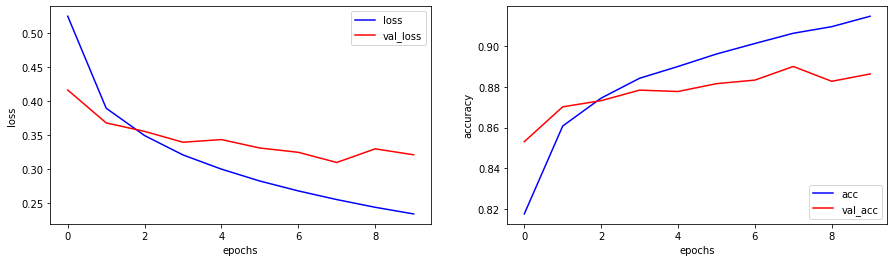

In [16]:
# 学習過程をグラフ表示する
plot_history(history.history)

In [17]:
# テスト用データで精度を確認する。
score = model.evaluate(x_test_rs, t_test_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.3456 - accuracy: 0.8777


In [18]:
# テスト用データから一部の画像を選んで、分類してみる

idxs = np.random.choice(range(len(x_test)), 50)

xs_rs = x_test_rs[idxs]
ys_cat = model(xs_rs)
ys = np.argmax(ys_cat, axis=1)

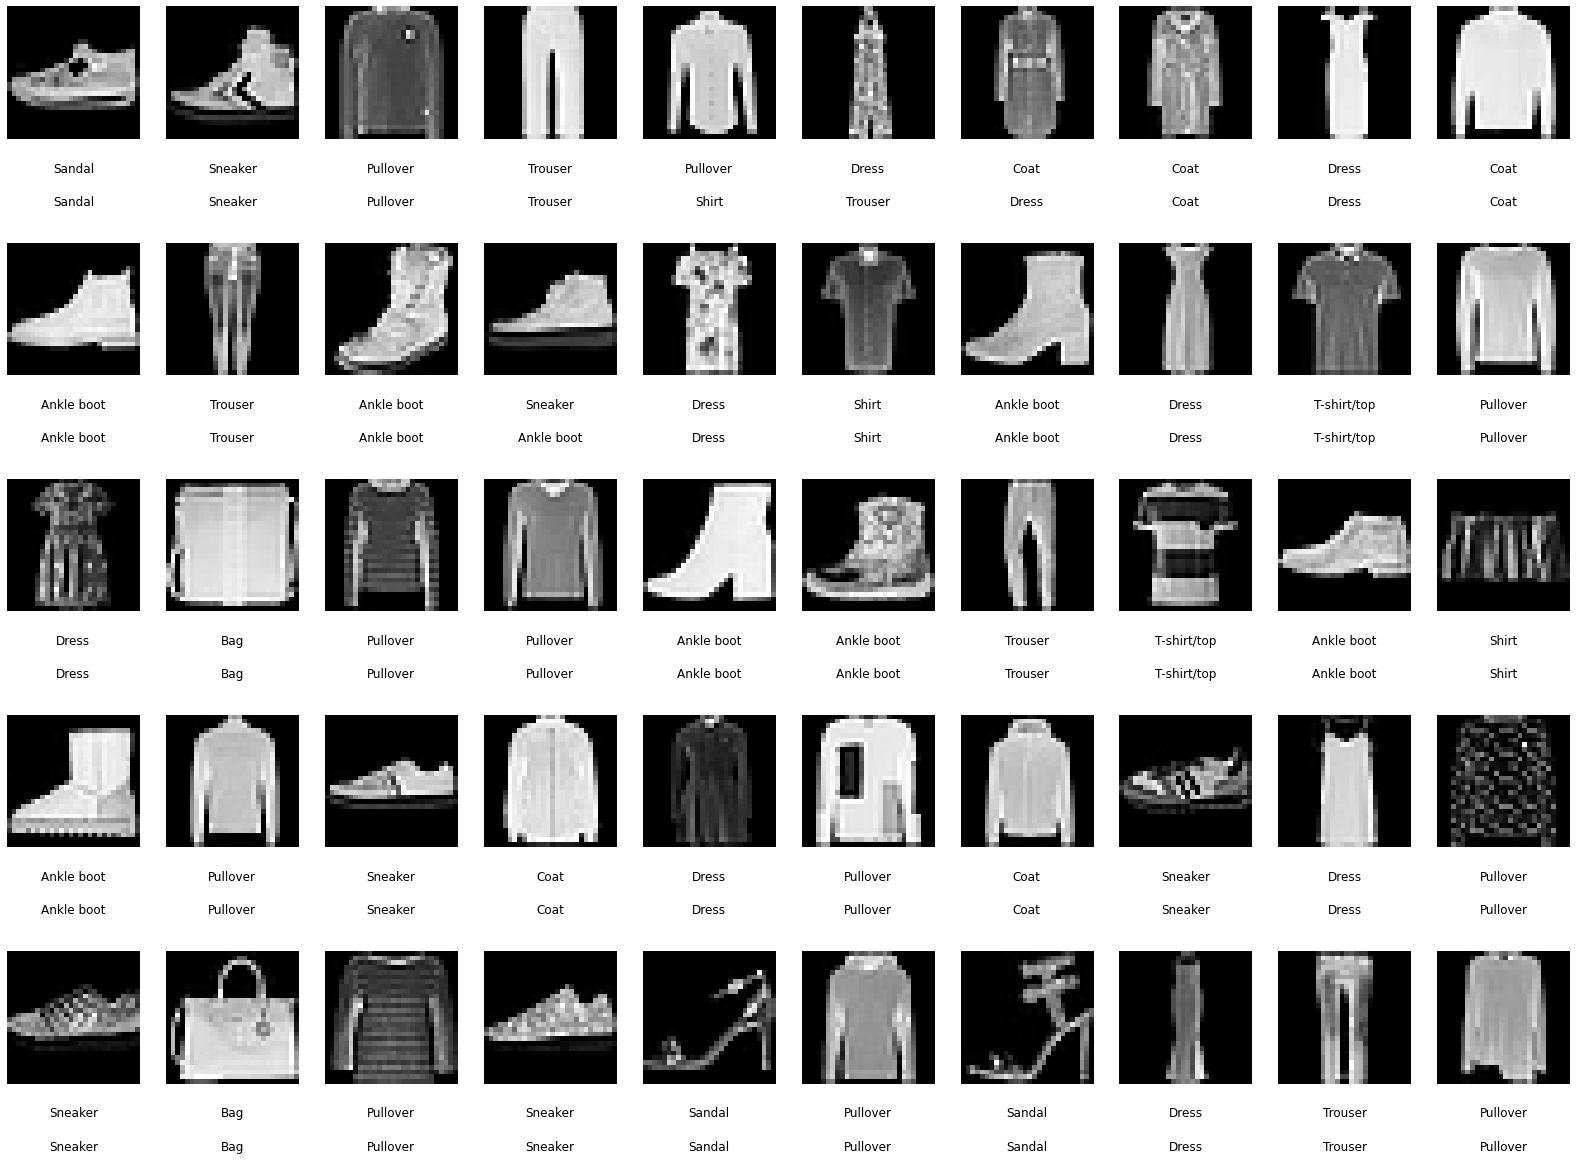

In [19]:
# テスト用データの一部の画像、予測、正解を表示する
showImages(x_test[idxs], ys, t_test[idxs], rows=5)